# Halpha maps DESI 

In [1]:
import numpy as np
import requests
import fitsio
import healpy as hp
import matplotlib.pyplot as plt

### Notes
open(file,'wb') would overwrite

### Externally from original source

In [3]:
# Dust Maps Schlafly, Green, Finkbeiner et al. 2014, ApJ 
# Documenation  https://lambda.gsfc.nasa.gov/product/foreground/fg_ebv_map_info.cfm
# File  https://lambda.gsfc.nasa.gov/data/foregrounds/EBV/ps1-ebv-4.5kpc.fits
# Downloading with python https://www.codementor.io/@aviaryan/downloading-files-from-urls-in-python-77q3bs0un

In [4]:
url = 'https://lambda.gsfc.nasa.gov/data/foregrounds/EBV/ps1-ebv-4.5kpc.fits'
pathsave='/global/u1/m/manera/myKP3/kp3sys-inputs/'

if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)

downloading... ps1-ebv-4.5kpc.fits


88087680

In [ ]:
myfile = '/global/u1/m/manera/myKP3/kp3sys-inputs/ps1-ebv-4.5kpc.fits'

In [5]:
h = fitsio.read_header(myfile)
print(h)


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                    8 / array data type
NAXIS   =                    0 / number of array dimensions
EXTEND  =                    T / 
URL     = 'http://faun.rc.fas.harvard.edu/eschlafly/2dmap' / 
REFERENC= 'Schlafly, Green, Finkbeiner, Rix, et al. 2014, ApJ' / 
PIXTYPE = 'HEALPIX'            / 
ORDERING= 'RING'               / 
NSIDE   =                  512 / 
NPIX    =              3145728 / 
FIRSTPIX=                    0 / 
LASTPIX =              3145727 / 
VERSION =                  1.0 / 
DISTANCE=                 4.54 / Distance to which E(B-V) is measured, kpc
COMMENT NOTE: reddenings in the PS1 bands are the most direct observable.
COMMENT These are transformed to E(B-V)_SFD via Schlafly & Finkbeiner (2011).
COMMENT The resulting map is expected to have the same overestimation of E(B-V)
COMMENT by 14% that the Schlegel, Finkbeiner, and Davis (1998) map has, and
COMMENT should be transformed for use in other b

### Rotation function

In [2]:
def rotate_map(hmap,coord):
    """
   Rotate a healpix map from galactic to equatorial, interpolating values.
   Adapted and notes by Marc Manera
   
    Parameters
    ----------
    hmap : healpix map (may not work for an array of maps)
      map(s) to be rotated
    coord : sequence of two character example coord = (['G','C']) 
      First character is the coordinate system of the input map, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

   """
   # Obtain healpy rotator.
   # NOTE: MAPS REVERSED
   # We rotate the maps in reverse new -> old, instead of old -> new
   # because we are not changing the values of the pixels, but their indices!
    r = hp.Rotator(coord=reversed(coord))
    
   # Get theta, phi input coordinates
    nside = hp.npix2nside(len(hmap))
    th,ph = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

   # Map onto coordinates by INVERSE ROTATIONÇ 
    throt, phrot = r(th,ph)
   # Interpolate the values of input map into an array of throt and phrot coordinates
   # This means, for healpix index 1 of new system 
   # I look where would the old coordinates be (thus inverse rotation)
   # and interpolate the values of the old map into the input position 
   # in the old coordinates, this would be indexed and new first value
   # thus result map is in the new coordinates, but by changing indices not values. 
    rot_map = hp.get_interp_val(hmap, throt, phrot)
    return rot_map

## Halpha MAPS nside = 256

In [11]:
# https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/

In [3]:
pathsave='/global/u1/m/manera/myKP3/kp3sys-inputs/'

url = 'https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/data/v1_1/healpix/Halpha_fwhm06_0256.fits'
if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)

url = 'https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/data/v1_1/healpix/Halpha_mask_fwhm06_0256.fits'

if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)

url = 'https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/data/v1_1/healpix/Halpha_error_fwhm06_0256.fits'

if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)


downloading... Halpha_fwhm06_0256.fits
downloading... Halpha_mask_fwhm06_0256.fits
downloading... Halpha_error_fwhm06_0256.fits


3156480

## Halpha MAPS nside = 512

In [4]:
pathsave='/global/u1/m/manera/myKP3/kp3sys-inputs/'

url = 'https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/data/v1_1/healpix/Halpha_fwhm06_0512.fits'
if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)

url = 'https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/data/v1_1/healpix/Halpha_mask_fwhm06_0512.fits'
if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)

url = 'https://faun.rc.fas.harvard.edu/dfink/skymaps/halpha/data/v1_1/healpix/Halpha_error_fwhm06_0512.fits'
if url.find('/'):
  filename = url.rsplit('/', 1)[1]
  print('downloading...',filename)

r = requests.get(url, allow_redirects=True)
open(pathsave+filename, 'wb').write(r.content)



downloading... Halpha_fwhm06_0512.fits
downloading... Halpha_mask_fwhm06_0512.fits
downloading... Halpha_error_fwhm06_0512.fits


12594240

## Rotate, interpolate, and save maps in equatorial coordinates

nside = 256

In [5]:
pathsave='/global/u1/m/manera/myKP3/kp3sys-inputs/'
pathout ='/global/u1/m/manera/myKP3/kp3sys-outputs/'

In [ ]:
nside = 256
coordrot = coord = (['G','C']) 

file_halpha_in = 'Halpha_fwhm06_0256.fits'
fileinput = pathsave+file_halpha_in
file_halpha_out = 'Halpha_map_nside256.fits'
fileout = pathout + file_halpha_out

halpha_map = hp.read_map(fileinput)
hp.mollview(halpha_map,title='Halpha Map',max=60,coord=["G"])
halpha_map = rotate_map(halpha_map,coordrot)
halpha_map = hp.ud_grade(halpha_map,nside)
hp.mollview(halpha_map,title='Halpha Map',max=60,coord=["C"])
hp.write_map(fileout, halpha_map, nest=False) #function write empty healpix header 


file_halpha_in = 'Halpha_mask_fwhm06_0256.fits'
fileinput = pathsave+file_halpha_in
file_halpha_out = 'Halpha_mask_nside256.fits'
fileout = pathout + file_halpha_out

halpha_map = hp.read_map(fileinput)
hp.mollview(halpha_map,title='Halpha Mask',coord=["G"])
halpha_map = rotate_map(halpha_map,coordrot)
halpha_map = hp.ud_grade(halpha_map,nside)
hp.mollview(halpha_map,title='Halpha Mask',coord=["C"])
hp.write_map(fileout, halpha_map, nest=False) #function write empty healpix header 



In [8]:
nside = 512

In [ ]:
nside = 512
coordrot = coord = (['G','C']) 

file_halpha_in = 'Halpha_fwhm06_0512.fits'
fileinput = pathsave+file_halpha_in
file_halpha_out = 'Halpha_map_nside512.fits'
fileout = pathout + file_halpha_out

halpha_map = hp.read_map(fileinput)
hp.mollview(halpha_map,title='Halpha Map',max=60,coord=["G"])
halpha_map = rotate_map(halpha_map,coordrot)
halpha_map = hp.ud_grade(halpha_map,nside)
hp.mollview(halpha_map,title='Halpha Map',max=60,coord=["C"])
hp.write_map(fileout, halpha_map, nest=False) #function write empty healpix header 


file_halpha_in = 'Halpha_mask_fwhm06_0512.fits'
fileinput = pathsave+file_halpha_in
file_halpha_out = 'Halpha_mask_nside512.fits'
fileout = pathout + file_halpha_out

halpha_map = hp.read_map(fileinput)
hp.mollview(halpha_map,title='Halpha Mask',coord=["G"])
halpha_map = rotate_map(halpha_map,coordrot)
halpha_map = hp.ud_grade(halpha_map,nside)
hp.mollview(halpha_map,title='Halpha Mask',coord=["C"])
hp.write_map(fileout, halpha_map, nest=False) #function write empty healpix header 



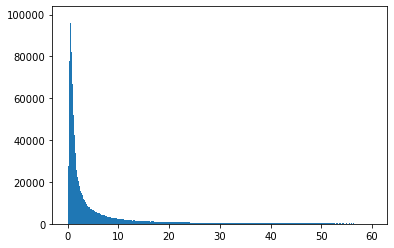

In [11]:
file_halpha_in = 'Halpha_fwhm06_0512.fits'
fileinput = pathsave+file_halpha_in
halpha_map = hp.read_map(fileinput)
plt.hist(halpha_map, range=[0,60],bins=1000)
plt.show()